In [1]:
#UCI machine elarning repository
#SMS Spam Collection Data Set
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tormo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection', encoding = 'utf8')]

In [4]:
print(len(messages))

5574


In [5]:
import pandas as pd

In [6]:
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'message'])

In [7]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['length'] = messages['message'].apply(len)

In [11]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%  matplotlib inline

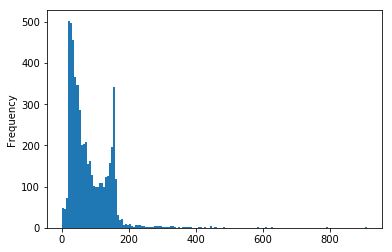

In [13]:
messages['length'].plot(bins = 150, kind = 'hist')

In [14]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [15]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1213D5CF8>,
      dtype=object)

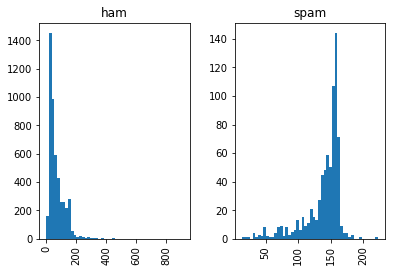

In [16]:
messages.hist(column = 'length', by = 'label', bins = 50)

In [17]:
#Mean ham length
#mean spam length

In [18]:
import string

In [19]:
mess = 'Sample message! Notice: it has punctuation.'

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
nopunc = [ char for char in mess if char not in string.punctuation]

In [22]:
nopunc = ''.join(nopunc)

In [23]:
nopunc

'Sample message Notice it has punctuation'

In [24]:
l=['a','b','c','d']
#leave empty for conc
'++++'.join(l)

'a++++b++++c++++d'

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [27]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [29]:
def text_process(mess):
    '''
    Takes in a string of text, then performs:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return a list of the clean text
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [32]:
#tf = term frequency
#idf = inverse document frequency
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [34]:
print(len(bow_transformer.vocabulary_))

11425


In [35]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [36]:
bow4 = bow_transformer.transform([message4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [37]:
print(bow_transformer.get_feature_names()[9554])

say


In [38]:
messages_bow = bow_transformer.transform(messages['message'])

In [39]:
print('Shape of Sparse Matrix:', messages_bow.shape)
print('Amount of Non-Zero occurences:', messages_bow.nnz)

Shape of Sparse Matrix: (5572, 11425)
Amount of Non-Zero occurences: 50548


In [40]:
from sklearn.metrics import classification_report

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size=0.2, random_state=42)

In [44]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('classifier', MultinomialNB())
])

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001C1216C2510>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [46]:
predictions = pipeline.predict(X_test)

In [47]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

        ham       1.00      0.99      0.99       977
       spam       0.91      0.98      0.94       138

avg / total       0.99      0.98      0.99      1115

